In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/benchmarking-gnns/data/LogicalPlan')

In [3]:
!pip install dgl-cu101
!pip install ogb

     |████████████████████████████████| 25.0MB 2.2MB/s 
     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=f23c12d965065af8b95b5ef884810a38075333afb09f02813cf958a10bc681e8
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=5a1bbf9dbd10f22a1d9aec64e5c9d99a87c13147dcbe04382205e64aa18c51e2
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built outdated littleutils


In [4]:
import numpy as np
import torch
import pickle
import time
import os
import matplotlib.pyplot as plt

In [5]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())

/content/drive/My Drive/benchmarking-gnns


In [6]:
import pickle
from data.logical_plan import LogicalPlanDatasetDGL
from data.logical_plan import LogicalPlanDataset
from data.data import LoadData
from torch.utils.data import DataLoader

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [7]:
DATASET_NAME = "LogicalPlan"
dataset = LogicalPlanDatasetDGL(DATASET_NAME)

preparing graphs for the TRAIN set...
preparing graphs for the VAL set...
preparing graphs for the TEST set...
Time taken: 3639.3004s


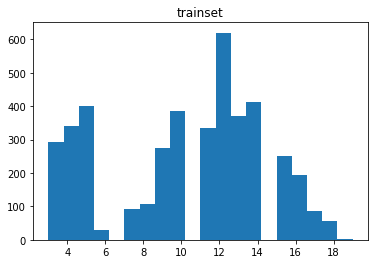

min/max : 3 19


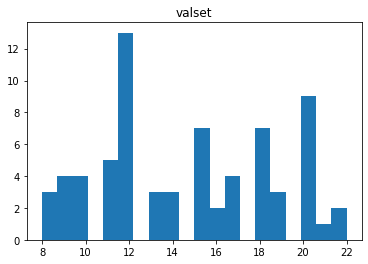

min/max : 8 22


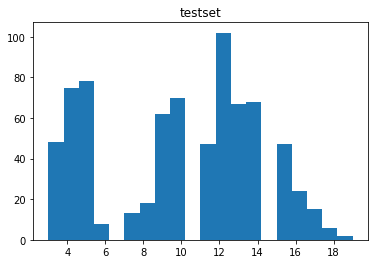

min/max : 3 19


In [8]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :', graph_sizes.min().long().item(), graph_sizes.max().long().item())


plot_histo_graphs(dataset.train, 'trainset')
plot_histo_graphs(dataset.val, 'valset')
plot_histo_graphs(dataset.test, 'testset')

In [9]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])

4250
70
750
(Graph(num_nodes=3, num_edges=2,
      ndata_schemes={'feat': Scheme(shape=(136,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32)}), tensor(0.2929))
(Graph(num_nodes=12, num_edges=9,
      ndata_schemes={'feat': Scheme(shape=(136,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32)}), tensor(0.2860))
(Graph(num_nodes=14, num_edges=11,
      ndata_schemes={'feat': Scheme(shape=(136,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32)}), tensor(0.7349))


In [10]:
num_atom_type = 136   #irrelevant
num_bond_type = 3   #irrelevant

In [11]:
start = time.time()
with open('data/LogicalPlan/LogicalPlan.pkl', 'wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test,num_atom_type,num_bond_type],f)
print('Time (sec):',time.time() - start)

Time (sec): 5.166076421737671


In [12]:
DATASET_NAME = 'LogicalPlan'
dataset = LoadData(DATASET_NAME)
print(dataset)
trainset, valset, testset = dataset.train, dataset.val, dataset.test

[I] Loading dataset LogicalPlan...
train, test, val sizes : 4250 750 70
[I] Finished loading.
[I] Data load time: 3.5499s


In [13]:
batch_size = 10
collate = LogicalPlanDataset.collate
print(LogicalPlanDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

data.logical_plan.LogicalPlanDataset


In [14]:
dataset._add_self_loops()
dataset._add_positional_encodings(8)

/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)
/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: DGLGraph.adjacency_matrix_scipy is deprecated. Please replace it with:

	DGLGraph.adjacency_matrix(transpose, scipy_fmt="csr").

  return warnings.warn(message, category=category, stacklevel=1)
